# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [58]:
#Carregando o arquivo
import pandas as pd

nasc_vivos = pd.read_csv('SINASC_RO_2019.csv')
nasc_vivos.head()
#print(nasc_vivos)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

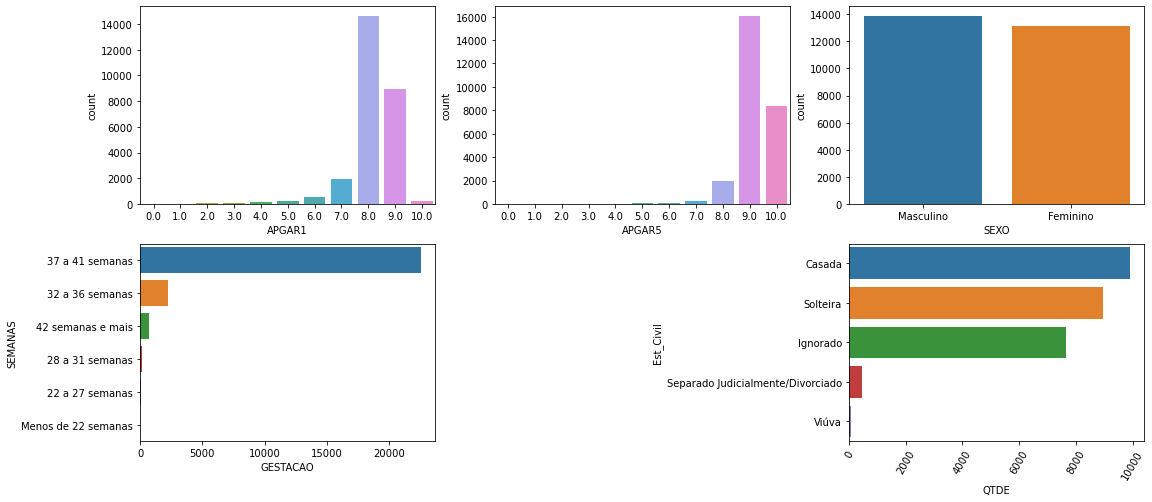

In [59]:
#Primeiro Gráfico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preparação de dados para o Gráfico de Gestação
gestacao_ord = nasc_vivos['GESTACAO'].value_counts().to_frame()
gestacao_ord = gestacao_ord.rename_axis('index').reset_index()
gestacao_ord.columns = ['SEMANAS', 'GESTACAO']

#Preparação de dados para o gráfico de Estado Civil
estcivmae = nasc_vivos['ESTCIVMAE'].map({1:'Solteira',2:'Casada',3:'Viúva',
                                         4:'Separado Judicialmente/Divorciado',9:'Ignorado'})
estcivmae_new=estcivmae.fillna('Ignorado')
estcivmae_ord=estcivmae_new.value_counts().to_frame()
estcivmae_ord = estcivmae_ord.rename_axis('index').reset_index()
estcivmae_ord.columns = ['Est_Civil', 'QTDE']


   


plt.rc('figure', figsize=(18,8))
fig, axes = plt.subplots(2,3)


sns.countplot(ax = axes[0,0], x='APGAR1', data = nasc_vivos)
sns.countplot(ax = axes[0,1], x='APGAR5', data = nasc_vivos)
sns.countplot(ax = axes[0,2], x='SEXO', data = nasc_vivos)
sns.barplot(ax = axes[1,0], x = 'GESTACAO', y = 'SEMANAS' , data = gestacao_ord)
sns.barplot(ax = axes[1,2], x = 'QTDE', y= 'Est_Civil' , data = estcivmae_ord)
axes[1,2].tick_params(axis='x',rotation=60)
axes[1,1].set_visible(False)





#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<AxesSubplot:xlabel='CONSULTAS', ylabel='APGAR5'>

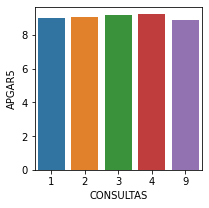

In [60]:
plt.close('all')
plt.rc('figure', figsize=(3,3))
fig, ax = plt.subplots()
sns.barplot( x = 'CONSULTAS', y = 'APGAR5' , ci=None, data = nasc_vivos)


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

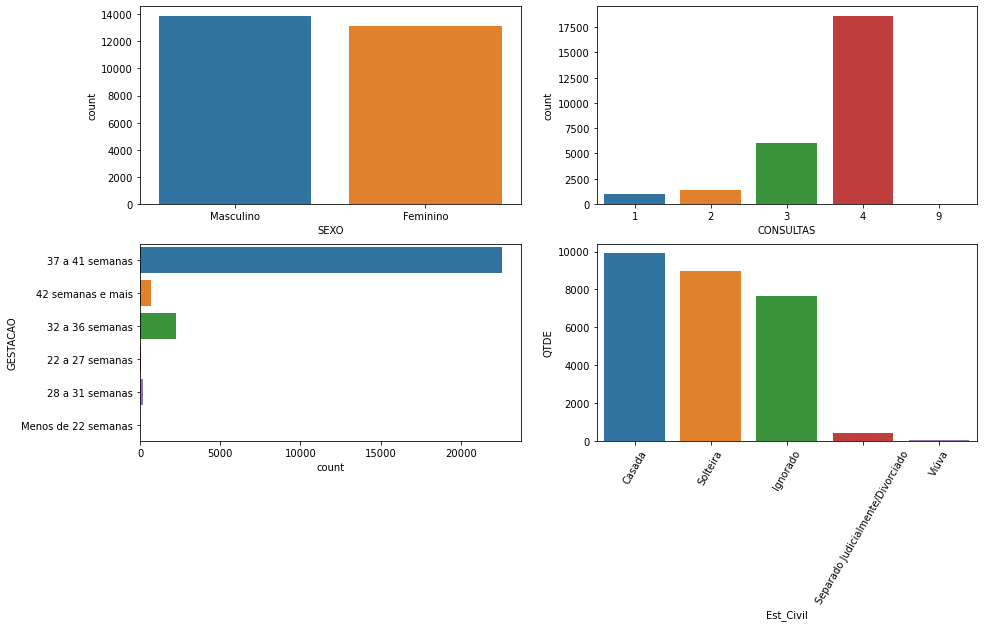

In [61]:
plt.close('all')
plt.rc('figure', figsize=(15,8))

fig, axes = plt.subplots(2,2)


sns.countplot(ax = axes[0,0],x='SEXO', data=nasc_vivos)
sns.countplot(ax = axes[1,0],y='GESTACAO', data=nasc_vivos)
sns.countplot(ax = axes[0,1],x='CONSULTAS', data=nasc_vivos)
sns.barplot(ax = axes[1,1], y = 'QTDE', x= 'Est_Civil' , data = estcivmae_ord)
axes[1,1].tick_params(axis='x',rotation=60)